# HDBSCAN 

## Import library

In [136]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

## Definition function 

In [102]:
# definition of plot function
def plot(X, labels, probability = None, parameters = None, ground_truth = False, ax = None ):
  if ax is None:
    fig, ax = plt.subplots(figsize = (9,9))
  #set labels: cluster labels 
  labels = labels if labels is not None else np.ones(X.shape[0]) 
  probability = probability if probability is not None else np.ones(X.shape[0])
  # remove noise
  unique_labels = set(labels)
  # set each clusters colors
  colors =[plt.cm.Spectral(i) for i in np.linspace(0, 1, len(unique_labels)) ] 
  
  proba_map = {idx: probability[idx] for idx in range(len(labels))}
  # plot each clusters 
  for k, col in zip(unique_labels, colors):
    if k == -1:
      col = [0,0,0,1]
    class_index = np.where(labels == k)[0]
    for ci in class_index:
      ax.plot(X[ci, 0], X[ci, 1],'x' if k == -1 else 'o', markerfacecolor = tuple(col), markeredgecolor ='k', markersize = 4 if k == -1 else 1+ 5*proba_map[ci])
  # set title for the pics
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  
  preamble = "True" if ground_truth else "Estimated"
  title = f'{preamble} number of clusters: {n_clusters}'
  if parameters is not None:
    parameters_str = ','.join(f'{k} = {v}' for k ,v in parameters.items())
    title += f'|{ parameters_str}'
  ax.set_title(title)
  plt.tight_layout()

## Import Dataset

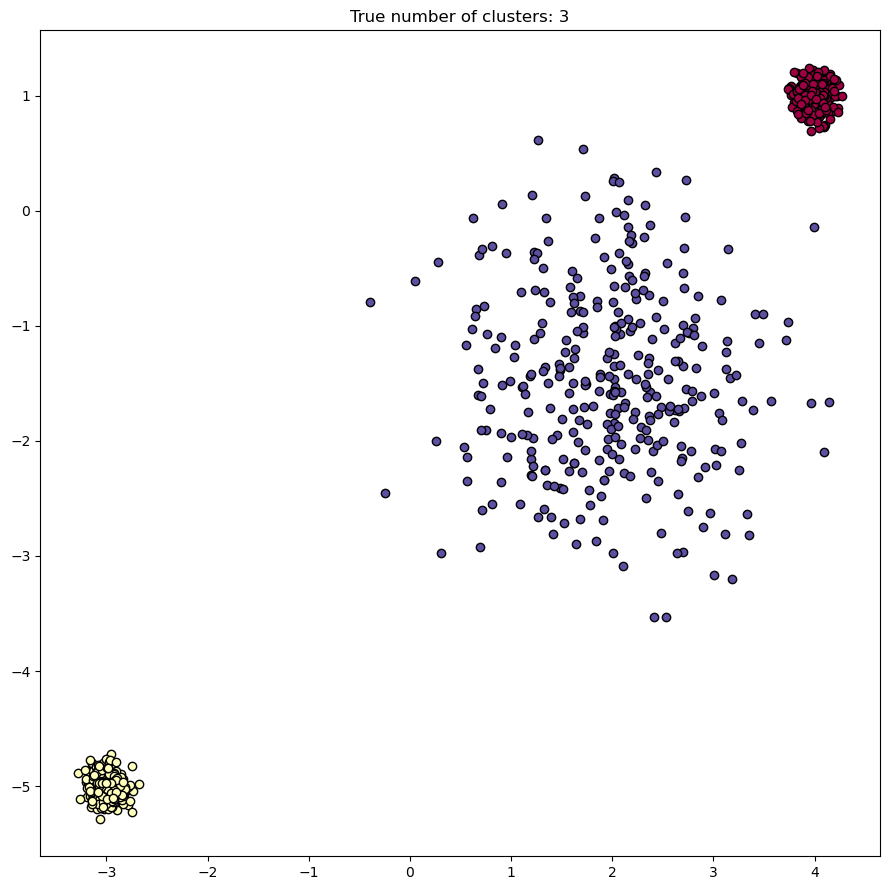

In [128]:
centers = [[4,1], [-3,-5],[2, -1.5]]
X, labels = make_blobs(n_samples = 1000, n_features= 2, centers= centers, cluster_std= [0.1, 0.1, 0.8], random_state= 0)
plot(X, labels, ground_truth= True)


## Find the best eps

In [132]:
# find the nearest neighbour for each point and distance accordingly
n = 5
nearest = NearestNeighbors(n_neighbors= n)
nearest.fit(X = X)
distance , indices = nearest.kneighbors(X = X)
# reorgornise the distance according the 5th nearest neighbour
distance = np.sort(distance, axis = 0)
dist = distance[:, n-1]
# finsd the biggest deta for each point which is the optimal eps 
pair = zip(dist[0:-1], dist[1:])
deta_distance = [b -a for a, b in pair]
arg_max = np.where(deta_distance == max(deta_distance))[0][0]
eps = dist[arg_max].round(3)
print(arg_max)
print(eps)

998
0.867


## DBSCAN

In [135]:
db = DBSCAN(eps = eps, min_samples = n)
db.fit(X = X)
labels = db.labels_

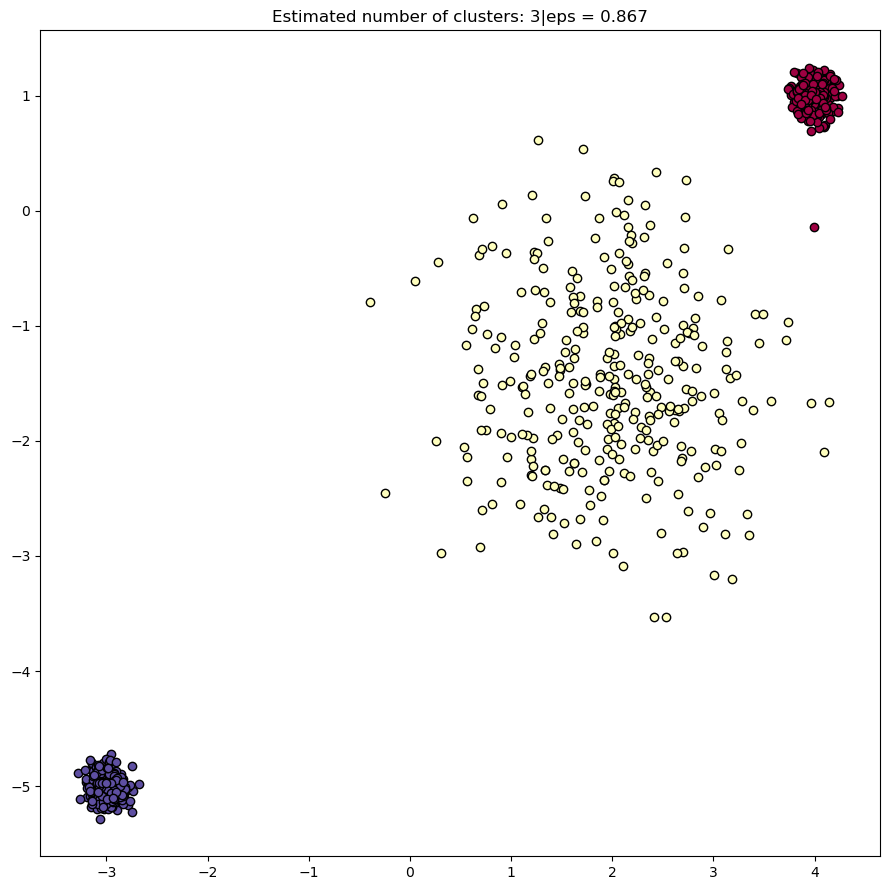

In [134]:
# plot the cluster
plot(X = X, labels= labels, parameters= {'eps':eps})

## HDBSCAN

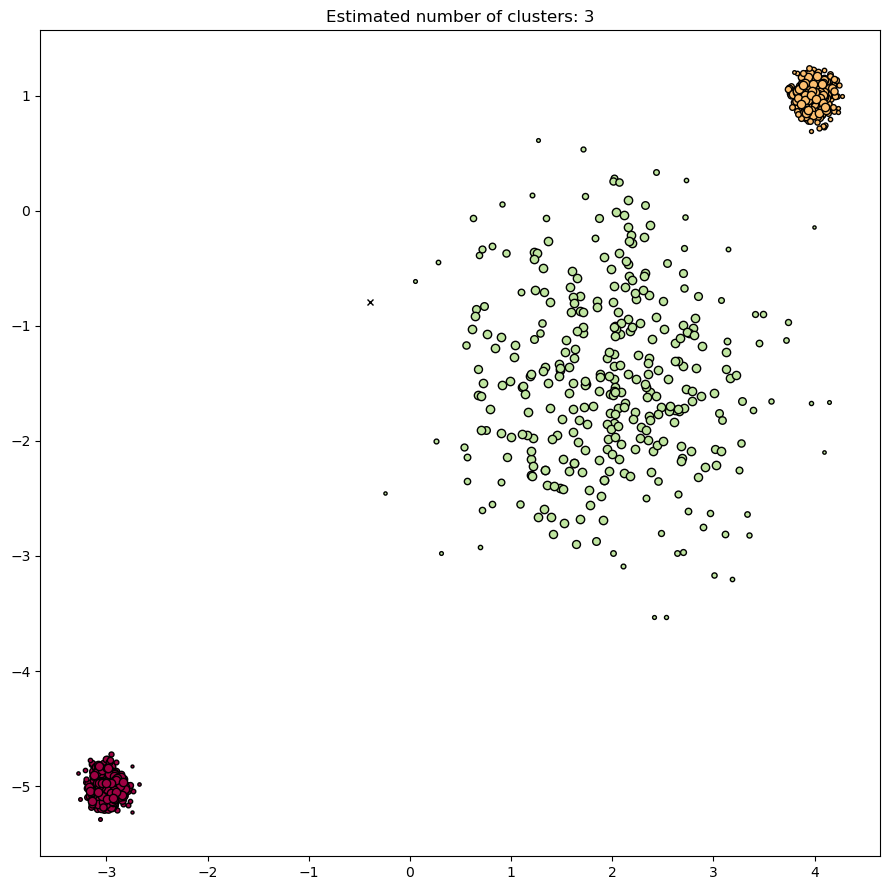

In [145]:
hdb = HDBSCAN()
hdb.fit(X = X)
labels_hdb = hdb.labels_
plot(X = X, labels= labels_hdb, probability=hdb.probabilities_ )